# Regressão MultiLinear - Exemplo real

* Determinando a relação multilinear entre umidade e temperatura utilizando dados da cidade de Szeged localizada na Hungria. Este é um dataset público do Kaggle (https://www.kaggle.com/budincsevity/szeged-weather)
* @CursoDS_ProfDanilo
* Prof. Dr. Danilo Morales Teixeira
* cursods.profdanilo@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('data_multivar_regr.txt')

In [3]:
dados.head()

,A,B,C,D
0,2.06,3.48,7.21,15.69
1,6.37,3.01,7.27,15.34
2,1.18,1.20,5.42,0.66
3,7.37,3.81,-1.95,38.37
4,6.16,1.39,7.39,9.96


Exibindo nomes das colunas

In [4]:
dados.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

As colunas Formatted Date, Summary e Daily Summary não são relevantes, podendo ser excluidas

In [5]:
dados = dados.drop(['Formatted Date','Summary','Daily Summary'],axis=1)

In [5]:
dados.head()

,A,B,C,D
0,2.06,3.48,7.21,15.69
1,6.37,3.01,7.27,15.34
2,1.18,1.20,5.42,0.66
3,7.37,3.81,-1.95,38.37
4,6.16,1.39,7.39,9.96


Determinando os tipos de precipitação

In [7]:
dados['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [8]:
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')

In [9]:
dados['Precip Type'].unique()

array(['rain', 'snow', 'sunny'], dtype=object)

<AxesSubplot: xlabel='A', ylabel='B'>

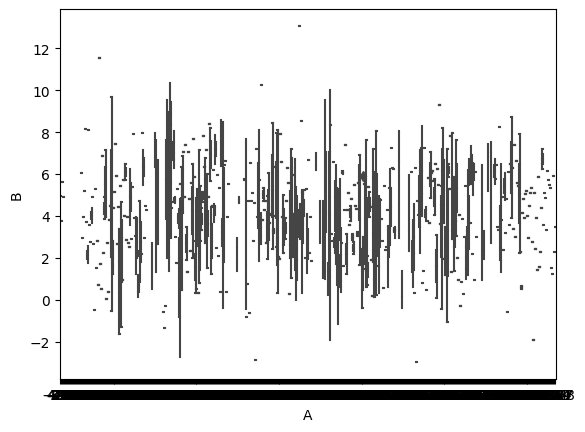

In [8]:
sns.boxplot(data=dados,y='B',x='A')

Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos

In [11]:
dias_sol = dados[(dados['Precip Type'] == 'sunny')]

In [12]:
dias_chuva = dados[(dados['Precip Type'] == 'rain')]

In [13]:
dias_neve = dados[(dados['Precip Type'] == 'snow')]

Graficando umidade em função da temperatura

<AxesSubplot: >

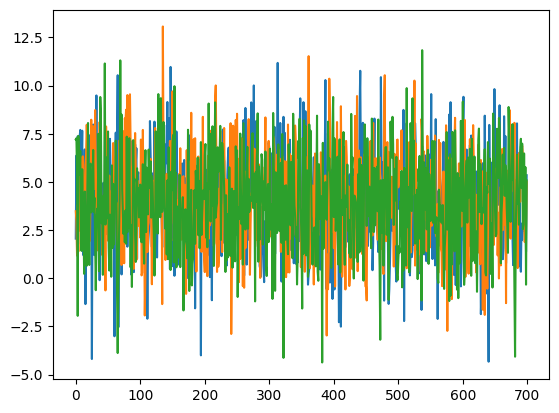

In [10]:
# fig, ax = plt.subplots(1,4,figsize=(12,5))
# dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol');
# dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva');
# dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve');
# dados.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[3],title='Todos');
# plt.tight_layout();

dados['A'].plot(x="A", y="B")
dados['B'].plot(x="A", y="C")
dados['C'].plot(x="A", y="D")

Dos gráficos observamos que os dias com sol apresentam uma relação mais próxima da linear. Nos dias com chuva podemos observar uma possível relação linear porém com uma dispersão muito maior. Já os dias com neve não é clara uma relação linear

# Dias de sol

In [15]:
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [16]:
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

Armazenando temperatura e umidade nas variáveis X e Y

In [11]:
# X = dias_sol.drop(['Humidity','Precip Type'],axis=1).values
# Y = dias_sol['Humidity'].values
X = dados.drop(['D'], axis=1).values
Y = dados['D'].values

Separando valores em amostras de treino e teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

In [14]:
X_treino.size

1470

In [15]:
X_teste.size

630

Criando modelo de regressão linear

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
modelo = LinearRegression()

In [18]:
modelo.fit(X_treino,Y_treino)

LinearRegression()

In [19]:
Y_previsto = modelo.predict(X_teste)

Analisando erros da previsão

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))

In [22]:
print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))

MAE = 3.9500
RMSE = 4.8387


# Dias de chuva

In [31]:
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [32]:
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [33]:
X_chuva = dias_chuva.drop(['Humidity','Precip Type'],axis=1).values
Y_chuva = dias_chuva['Humidity'].values

In [34]:
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)

In [35]:
X_treino_chuva.size

417592

In [36]:
X_teste_chuva.size

178976

In [37]:
modelo2 = LinearRegression()

In [38]:
modelo2.fit(X_treino_chuva,Y_treino_chuva)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

In [40]:
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))

In [41]:
print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))

MAE = 0.1100
RMSE = 0.1394


# Dias com neve

In [42]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [43]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [44]:
X_neve = dias_neve.drop(['Humidity','Precip Type'],axis=1).values
Y_neve = dias_neve['Humidity'].values

In [45]:
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)

In [46]:
X_treino_neve.size

52486

In [47]:
X_teste_neve.size

22498

In [48]:
modelo3 = LinearRegression()

In [49]:
modelo3.fit(X_treino_neve,Y_treino_neve)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
Y_previsto_neve = modelo3.predict(X_teste_neve)

In [51]:
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))

In [52]:
print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))

MAE = 0.0583
RMSE = 0.0891
